In [1]:
import pandas as pd
# Imports
import pandas as pd
import numpy as np
#from keras.models import Sequential
#from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import KernelPCA



from sklearn.model_selection import KFold
#from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#from imblearn.over_sampling import SMOTE

# Load the data from CSV files into DataFrames
zone_data_1A = pd.read_csv('../[3.1] - OUTLIER_REMOVAL/zone_data_1A_MONTHLY.csv')
zone_data_7 = pd.read_csv('../[3.1] - OUTLIER_REMOVAL/zone_data_7_MONTHLY.csv')
zone_data_6 = pd.read_csv('../[3.1] - OUTLIER_REMOVAL/zone_data_6_MONTHLY.csv')


# Copy the data to avoid SettingWithCopyWarning
zone_data_1A_top_sorted = zone_data_1A.copy()
#zone_data_1A_bottom_sorted = zone_data_1A_bottom.copy()

# Copy the data for zone 6 and zone 7 to avoid SettingWithCopyWarning
zone_data_6_top_sorted = zone_data_6.copy()
#zone_data_6_bottom_sorted = zone_data_6.copy()

zone_data_7_top_sorted = zone_data_7.copy()
#zone_data_7_bottom_sorted = zone_data_7.copy()

# Order the data by 'Create_date_ordinal' from lowest to highest
zone_data_1A_top_sorted.sort_values(by='date', ascending=True, inplace=True)
#zone_data_1A_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)

# Order the data by 'Create_date_ordinal' from lowest to highest
zone_data_6_top_sorted.sort_values(by='date', ascending=True, inplace=True)
#zone_data_6_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)

zone_data_7_top_sorted.sort_values(by='date', ascending=True, inplace=True)
#zone_data_7_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)






In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import seaborn as sns


series_data = zone_data_1A_top_sorted['mean_price']

# Define the range for p and q
p_range = q_range = 10

aic_values = np.zeros((p_range+1, q_range+1))
bic_values = np.zeros((p_range+1, q_range+1))

for p in range(p_range + 1):
    for q in range(q_range + 1):
        try:
            model = ARIMA(series_data, order=(p,0,q))
            results = model.fit()
            aic_values[p, q] = results.aic
            bic_values[p, q] = results.bic
        except:
            aic_values[p, q] = None
            bic_values[p, q] = None

# Swapping in AIC matrix



/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sar

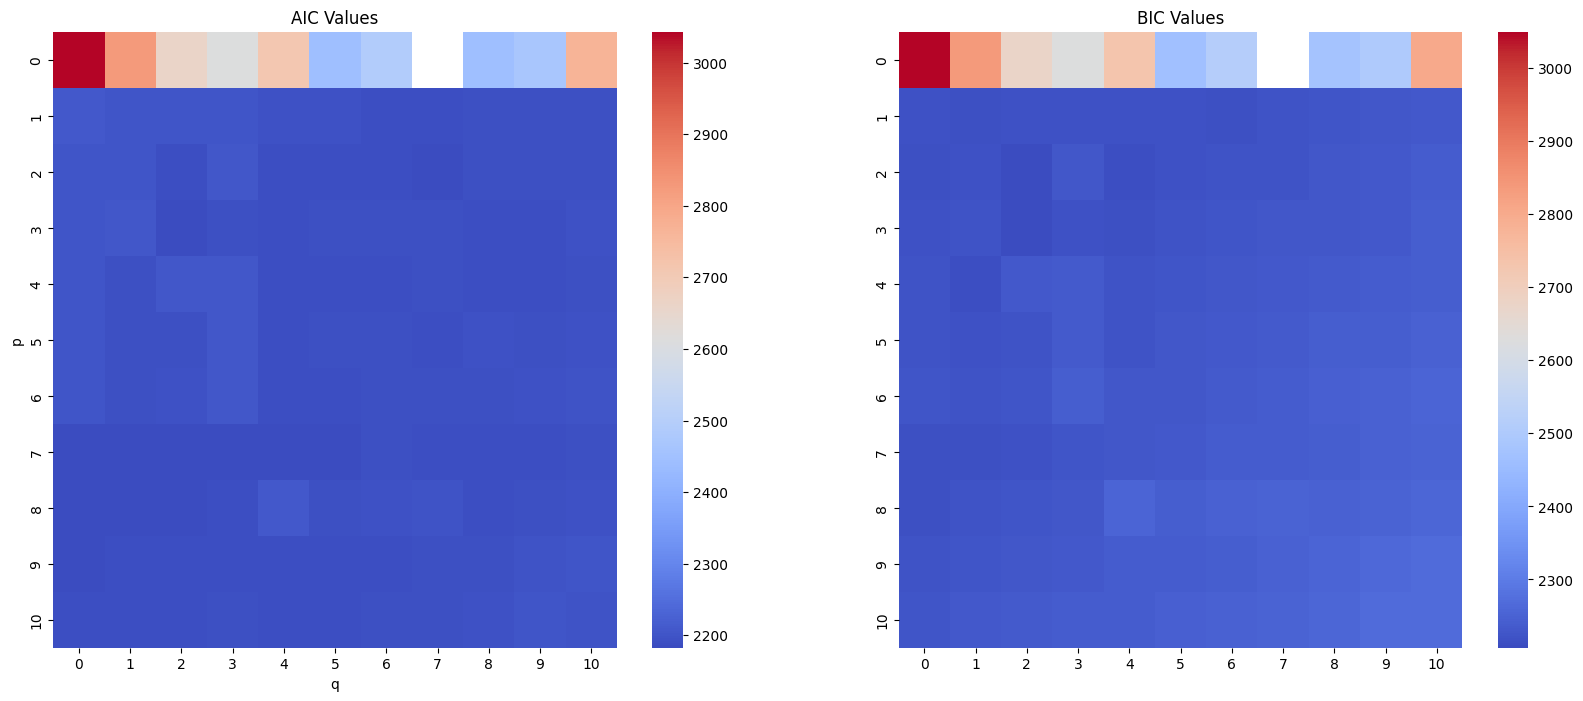

In [30]:

#plotting

plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title('AIC Values')
sns.heatmap(aic_values, annot=False, fmt=".2f", cmap='coolwarm', annot_kws={"size": 6})
plt.xlabel('q')
plt.ylabel('p')
plt.subplot(122)
plt.title('BIC Values')
plt.xlabel('q')
plt.ylabel('p')
sns.heatmap(bic_values, annot=False,  fmt=".2f", cmap='coolwarm', annot_kws={"size": 6})
plt.show()